## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [2]:
import pandas as pd
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

In [3]:
X = heart[["age", 'chol']]
y = heart['diagnosis']

In [4]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [5]:
logfit = LogisticRegression().fit(X,y)

In [6]:
logfit.coef_

array([[0.04686331, 0.00180124]])

In [7]:
logfit.intercept_

array([-3.24011226])

0 = .047 * 55 + .0018 * x - 3.24

x = 363.9

In [8]:
import math
math.log(.9/(1-.9))

2.1972245773362196

2.19 = .047 * 55 + .0018 * x - 3.24

x = 1580.56

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [9]:
ldafit = LinearDiscriminantAnalysis().fit(X,y)

In [10]:
ldafit.coef_

array([[0.04655744, 0.00178967]])

In [11]:
ldafit.intercept_

array([-3.21967766])

0 = .466*55 + .0018*x - 3.22

x = 368.2

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [12]:
from sklearn.model_selection import GridSearchCV
svc = Pipeline([("svc", SVC(kernel = 'linear'))])
tune = {'svc__C': [.1,.2,.3,.4,5,.6,.7,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]}

gscv1 = GridSearchCV(svc, tune, cv = 5, scoring='r2')
gscv1fit = gscv1.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 101, in _check_reg_targets
    y_true = check_array(y_true, en

In [17]:
gscv1fit.best_params_

{'svc__C': 0.1}

In [18]:
svc = Pipeline([("svc", SVC(C = .1, kernel = 'linear'))])
svcfit = svc.fit(X,y)

In [15]:
svcfit.named_steps['svc'].coef_

array([[0.06439804, 0.00366067]])

In [16]:
svcfit.named_steps['svc'].intercept_

array([-4.68655043])

0 = .064 * 55 + .0037 * x - 4.69

x = 316.22

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [19]:
svcfit.named_steps['svc'].coef_[0]

array([0.06439804, 0.00366067])

x2 = -w1/w2 * X1 - b/w2

In [28]:
ldafit.coef_

array([[0.04655744, 0.00178967]])

In [29]:
logfit.coef_

array([[0.04686331, 0.00180124]])

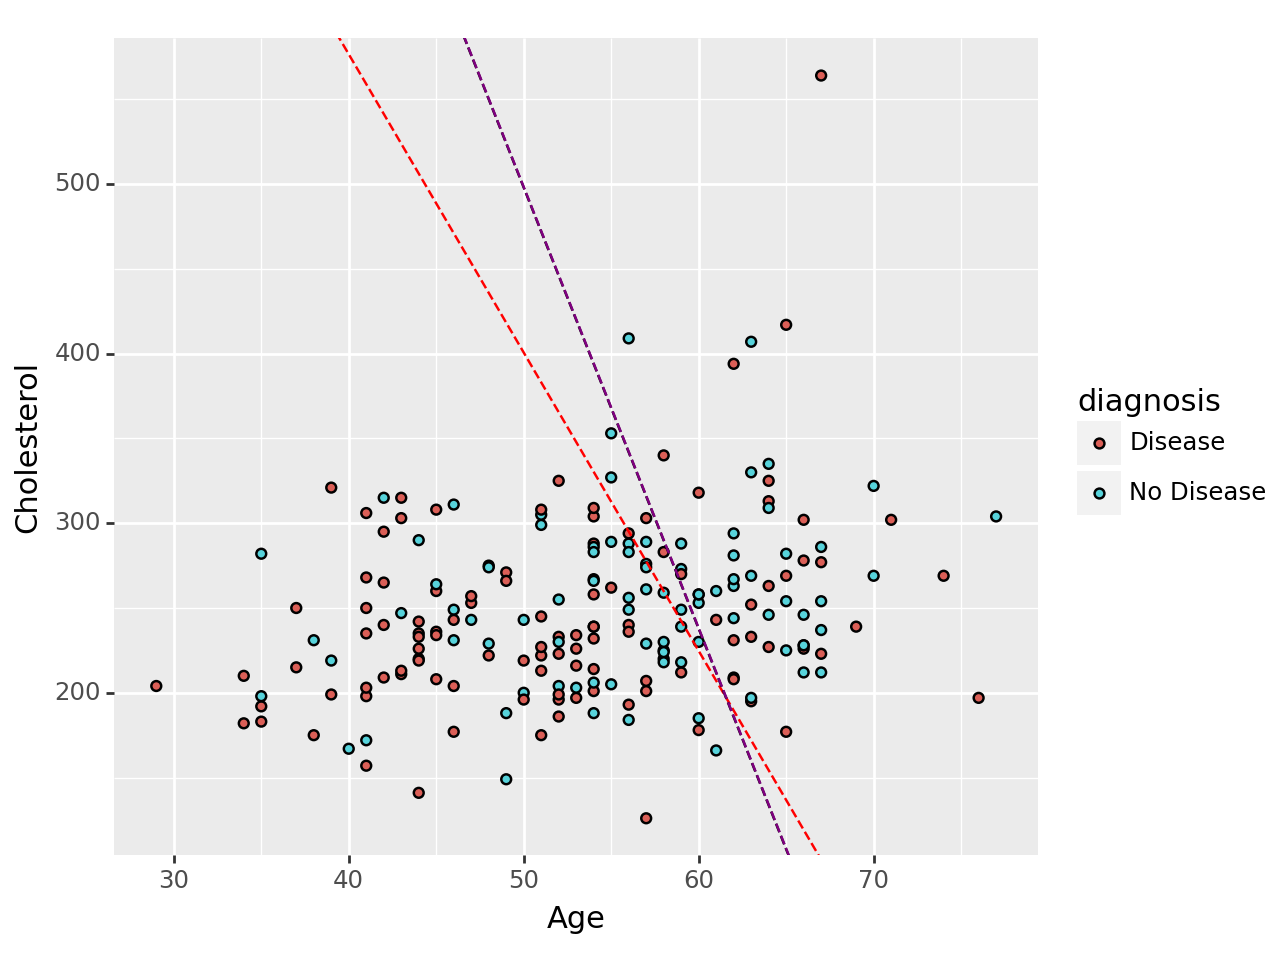

<Figure Size: (640 x 480)>

In [27]:
from plotnine import *
(ggplot(heart, aes(x = 'age', y = 'chol', fill = 'diagnosis')) +
geom_point() +
geom_abline(intercept=-svcfit.named_steps['svc'].intercept_/svcfit.named_steps['svc'].coef_[0][1], slope=-svcfit.named_steps['svc'].coef_[0][0]/svcfit.named_steps['svc'].coef_[0][1], color='red', linetype='dashed') +
geom_abline(intercept=-logfit.intercept_/logfit.coef_[0][1], slope=-logfit.coef_[0][0]/logfit.coef_[0][1], color='black', linetype='dashed') +
geom_abline(intercept=-ldafit.intercept_/ldafit.coef_[0][1], slope=-ldafit.coef_[0][0]/ldafit.coef_[0][1], color='purple', linetype='dashed') +

 xlab("Age") +
ylab("Cholesterol"))

Red line: SVC
Purple Line: LDA
Black Line: Log